In [1]:
import earthnet_minicuber as emc
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import datetime
import folium
import xarray as xr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])

In [2]:
# Hide warnings (many since some xarray class uses some deprecated python function on 3.9)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import rioxarray as rioxr

In [26]:
tif = rioxr.open_rasterio("C:/Users/dozhang/Downloads/geom_90M_n45e020.tif")
tif

<xarray.DataArray (band: 1, y: 6000, x: 6000)> Size: 36MB
[36000000 values with dtype=uint8]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 48kB 20.0 20.0 20.0 20.0 ... 25.0 25.0 25.0 25.0
  * y            (y) float64 48kB 50.0 50.0 50.0 50.0 ... 45.0 45.0 45.0 45.0
    spatial_ref  int32 4B 0
Attributes:
    TIFFTAG_IMAGEDESCRIPTION:  geom geomorphometry variable derived from MERI...
    TIFFTAG_DATETIME:          2019
    TIFFTAG_ARTIST:            Giuseppe Amatulli (giuseppe.amatulli@gmail.com)
    AREA_OR_POINT:             Area
    _FillValue:                0
    scale_factor:              1.0
    add_offset:                0.0

In [4]:
bands = ['TG', 'TN', 'TX', 'RR', 'PP', 'HU', 'FG', 'QQ']
paths = ["C:/Users/dozhang/Downloads/tg_ens_mean_0.1deg_reg_v26.0e.nc", 
         "C:/Users/dozhang/Downloads/tn_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/tx_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/rr_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/pp_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/hu_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/fg_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/qq_ens_mean_0.1deg_reg_v26.0e.nc"]
bands_dict = dict(zip(bands, paths))
specs = {
    "lon_lat": (22.05, 47.37), # center pixel
    "xy_shape": (128, 128), # width, height of cutout around center pixel
    "resolution": 20, # in meters.. will use this on a local UTM grid..
    "time_interval": "2021-03-12/2021-08-04",
    "providers": [
        {
            "name": "s2",
            "kwargs": {
                "bands": ["B02", "B03", "B04", "B8A", "SCL"],  # , "B09", "B11", "B12"],
                "best_orbit_filter": False,
                "five_daily_filter": True,
                "brdf_correction": False,
                "cloud_mask": True,
                "cloud_mask_rescale_factor": 2,
                "aws_bucket": "planetary_computer",
            },
        },

            # RasterioIOError('CURL error: schannel: CertGetCertificateChain trust error CERT_TRUST_IS_UNTRUSTED_ROOT')
            # {"name": "srtm", "kwargs": {"bands": ["dem"]}},
            
            {"name": "nasa", "kwargs": {}},
            {"name": "alos", "kwargs": {}},
            {"name": "cop", "kwargs": {}},
        {
            "name": "esawc",
            "kwargs": {"bands": ["lc"], "aws_bucket": "planetary_computer"},
        },
        {
            "name": "geom",
            "kwargs": {"filepath": "C:/Users/dozhang/Downloads/geom_90M_n45e020.tif"}
        },
        {
            "name": "eobs",
            "kwargs": {"bands": bands_dict}
        }
    ],
}

In [7]:
# cube = emc.load_minicube(specs, compute = True)
# path = "E:\DZ\greenearthnet\ood-t_chopped\JAS21\minicube_0_29SND_39.29_-8.56.nc"
# path = "E:\DZ\greenearthnet\ood-t_chopped\MJJ21\minicube_225_34TET_47.37_22.05.nc"
path = "C:/Users/dozhang/Downloads/MJJ_reproduced_minicube_225_34TET_47.37_22.05.nc"
test = xr.open_dataset(path)
test

<xarray.Dataset> Size: 668kB
Dimensions:   (time: 150, lat: 128, lon: 128)
Coordinates:
  * time      (time) datetime64[ns] 1kB 2021-03-08 2021-03-09 ... 2021-08-04
  * lon       (lon) float64 1kB 22.03 22.03 22.03 22.03 ... 22.07 22.07 22.07
  * lat       (lat) float64 1kB 47.38 47.38 47.38 47.38 ... 47.36 47.36 47.36
Data variables: (12/13)
    eobs_tg   (time) float64 1kB ...
    eobs_tn   (time) float64 1kB ...
    eobs_tx   (time) float64 1kB ...
    eobs_rr   (time) float64 1kB ...
    eobs_pp   (time) float64 1kB ...
    eobs_hu   (time) float64 1kB ...
    ...        ...
    eobs_qq   (time) float64 1kB ...
    nasa_dem  (lat, lon) float64 131kB ...
    alos_dem  (lat, lon) float64 131kB ...
    cop_dem   (lat, lon) float64 131kB ...
    esawc_lc  (lat, lon) float64 131kB ...
    geom_cls  (lat, lon) float64 131kB ...
Attributes:
    history:  Created on 2025-09-30 22:40:23.876446 with the earthnet-minicub...

In [62]:
input

<xarray.Dataset> Size: 119MB
Dimensions:              (time: 150, lon: 128, lat: 128)
Coordinates:
  * time                 (time) datetime64[ns] 1kB 2021-03-08 ... 2021-08-04
  * lon                  (lon) float64 1kB 22.03 22.03 22.03 ... 22.07 22.07
  * lat                  (lat) float64 1kB 47.38 47.38 47.38 ... 47.35 47.35
    sentinel:product_id  float64 8B ...
    latitude_eobs        float64 8B ...
    longitude_eobs       float64 8B ...
Data variables: (12/21)
    s2_SCL               (time, lat, lon) float64 20MB ...
    s2_avail             (time) float64 1kB nan nan nan nan ... nan nan nan 1.0
    s2_B02               (time, lat, lon) float64 20MB ...
    s2_B03               (time, lat, lon) float64 20MB ...
    s2_B04               (time, lat, lon) float64 20MB ...
    s2_B8A               (time, lat, lon) float64 20MB ...
    ...                   ...
    eobs_rr              (time) float64 1kB ...
    eobs_tg              (time) float64 1kB ...
    eobs_tn              (time) float64 1kB ...
    eobs_tx              (time) float64 1kB ...
    s2_dlmask            (time, lat, lon) float64 20MB ...
    eobs_fgv26           (time) float64 1kB ...
Attributes:
    dataset_name:        EarthNet2021x
    dataset_name_short:  en21x
    dataset_version:     v1.0
    description:         This is a minicube from the EarthNet2021x dataset, a...
    provided_by:         Max-Planck-Institute for Biogeochemistry

In [35]:
cube = cube.drop_vars(["angle"])

In [6]:
cube

<xarray.Dataset> Size: 115MB
Dimensions:   (time: 146, lon: 128, lat: 128)
Coordinates:
  * time      (time) datetime64[ns] 1kB 2021-03-12 2021-03-13 ... 2021-08-04
  * lon       (lon) float64 1kB 22.03 22.03 22.03 22.03 ... 22.07 22.07 22.07
  * lat       (lat) float64 1kB 47.38 47.38 47.38 47.38 ... 47.36 47.36 47.36
Data variables: (12/20)
    s2_SCL    (time, lat, lon) float64 19MB 5.0 5.0 5.0 7.0 ... 7.0 7.0 2.0 2.0
    s2_mask   (time, lat, lon) float64 19MB 0.0 0.0 0.0 0.0 ... 3.0 3.0 3.0 3.0
    s2_avail  (time) float32 584B 1.0 nan nan nan nan ... nan nan nan nan 1.0
    s2_B02    (time, lat, lon) float64 19MB 0.04023 0.03408 ... 0.05452 0.05095
    s2_B03    (time, lat, lon) float64 19MB 0.05117 0.044 ... 0.0601 0.05792
    s2_B04    (time, lat, lon) float64 19MB 0.07044 0.0599 ... 0.06783 0.06536
    ...        ...
    eobs_qq   (time) float32 584B 201.0 190.0 171.0 87.0 ... 223.0 262.0 303.0
    nasa_dem  (lat, lon) float64 131kB 134.0 133.4 132.4 ... 106.8 107.3 106.8
    alos_dem  (lat, lon) float64 131kB 133.7 132.4 131.7 ... 108.4 109.0 108.6
    cop_dem   (lat, lon) float64 131kB 132.5 132.0 131.7 ... 105.7 105.8 105.9
    esawc_lc  (lat, lon) float32 66kB 40.0 40.0 40.0 40.0 ... 40.0 40.0 40.0
    geom_cls  (lat, lon) float32 66kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    history:  Created on 2025-09-30 22:26:53.407912 with the earthnet-minicub...

In [16]:
# input = xr.open_dataset("E:\DZ\greenearthnet\ood-t_chopped\MJJ21\minicube_225_34TET_47.37_22.05.nc")
# emc.plot_rgb(input, mask=True)
# emc.plot_rgb(cube, mask=True)
input = xr.open_dataset("C:/Users/dozhang/Documents/GitHub/greenearthnet/development/greenearthnet/replicated_minicubes/MJJ_reproduced_minicube_225_34TET_47.37_22.05.nc")
input

<xarray.Dataset> Size: 115MB
Dimensions:    (time: 146, lon: 128, lat: 128)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2021-03-12 2021-03-13 ... 2021-08-04
  * lon        (lon) float64 1kB 22.03 22.03 22.03 22.03 ... 22.07 22.07 22.07
  * lat        (lat) float64 1kB 47.38 47.38 47.38 47.38 ... 47.36 47.36 47.36
Data variables: (12/20)
    s2_SCL     (time, lat, lon) float64 19MB ...
    s2_dlmask  (time, lat, lon) float64 19MB ...
    s2_avail   (time) float64 1kB ...
    s2_B02     (time, lat, lon) float64 19MB ...
    s2_B03     (time, lat, lon) float64 19MB ...
    s2_B04     (time, lat, lon) float64 19MB ...
    ...         ...
    eobs_qq    (time) float64 1kB ...
    nasa_dem   (lat, lon) float64 131kB ...
    alos_dem   (lat, lon) float64 131kB ...
    cop_dem    (lat, lon) float64 131kB ...
    esawc_lc   (lat, lon) float64 131kB ...
    geom_cls   (lat, lon) float64 131kB ...
Attributes:
    history:  Created on 2025-09-30 22:29:39.506614 with the earthnet-minicub...

### If instead of on-the-fly, you prefer to save the minicube to disk:

In [ ]:
bands = ['TG', 'TN', 'TX', 'RR', 'PP', 'HU', 'FG', 'QQ']
paths = ["C:/Users/dozhang/Downloads/tg_ens_mean_0.1deg_reg_v26.0e.nc", 
         "C:/Users/dozhang/Downloads/tn_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/tx_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/rr_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/pp_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/hu_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/fg_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/qq_ens_mean_0.1deg_reg_v26.0e.nc"]
bands_dict = dict(zip(bands, paths))
specs = {
    "lon_lat": (-8.56, 39.29), # center pixel
    "xy_shape": (128, 128), # width, height of cutout around center pixel
    "resolution": 20, # in meters.. will use this on a local UTM grid..
    "time_interval": "2021-05-10/2021-10-06",
    "providers": [
        {
            "name": "s2",
            "kwargs": {
                "bands": ["B02", "B03", "B04", "B8A", "SCL"],  # , "B09", "B11", "B12"],
                "best_orbit_filter": True,
                "five_daily_filter": False,
                "brdf_correction": True,
                "cloud_mask": True,
                "cloud_mask_rescale_factor": 2,
                "aws_bucket": "planetary_computer",
            },
        },

            # RasterioIOError('CURL error: schannel: CertGetCertificateChain trust error CERT_TRUST_IS_UNTRUSTED_ROOT')
            # {"name": "srtm", "kwargs": {"bands": ["dem"]}},
            
            {"name": "nasa", "kwargs": {}},
            {"name": "alos", "kwargs": {}},
            {"name": "cop", "kwargs": {}},
        {
            "name": "esawc",
            "kwargs": {"bands": ["lc"], "aws_bucket": "planetary_computer"},
        },
        {
            "name": "geom",
            "kwargs": {"filepath": "C:/Users/dozhang/Downloads/geom_90M_n35w010.tif"}
        },
        {
            "name": "eobs",
            "kwargs": {"bands": bands_dict}
        }
    ],
}
cube = emc.Minicuber.save_minicube(specs,"C:/Users/dozhang/Downloads/JAS_replicated_minicube_0_29SND_39.29_-8.56.nc")

Loading Sentinel2 for 2021-05-10/2021-05-31
Loading EOBS for 2021-05-10/2021-05-31
Loading Sentinel2 for 2021-06-01/2021-06-30
Loading EOBS for 2021-06-01/2021-06-30
Loading Sentinel2 for 2021-07-01/2021-07-31
Loading EOBS for 2021-07-01/2021-07-31
Loading Sentinel2 for 2021-08-01/2021-08-31
Loading EOBS for 2021-08-01/2021-08-31
Loading Sentinel2 for 2021-09-01/2021-10-06
Loading EOBS for 2021-09-01/2021-10-06
Loading NASADEM
Loading ALOSWorld
Loading Copernicus30
Loading ESAWorldcover
Loading Geomorphons
Saving minicube at (-8.56, 39.29)


In [ ]:
bands = ['TG', 'TN', 'TX', 'RR', 'PP', 'HU', 'FG', 'QQ']
paths = ["C:/Users/dozhang/Downloads/tg_ens_mean_0.1deg_reg_v26.0e.nc", 
         "C:/Users/dozhang/Downloads/tn_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/tx_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/rr_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/pp_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/hu_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/fg_ens_mean_0.1deg_reg_v26.0e.nc",
         "C:/Users/dozhang/Downloads/qq_ens_mean_0.1deg_reg_v26.0e.nc"]
bands_dict = dict(zip(bands, paths))
specs = {
    "lon_lat": (22.05, 47.37), # center pixel
    "xy_shape": (128, 128), # width, height of cutout around center pixel
    "resolution": 20, # in meters.. will use this on a local UTM grid..
    "time_interval": "2021-03-08/2021-08-04",
    "providers": [
        {
            "name": "s2",
            "kwargs": {
                "bands": ["B02", "B03", "B04", "B8A", "SCL"],  # , "B09", "B11", "B12"],
                "best_orbit_filter": False,
                "five_daily_filter": True,
                "brdf_correction": False,
                "cloud_mask": True,
                "cloud_mask_rescale_factor": 2,
                "aws_bucket": "planetary_computer",
            },
        },

            # RasterioIOError('CURL error: schannel: CertGetCertificateChain trust error CERT_TRUST_IS_UNTRUSTED_ROOT')
            # {"name": "srtm", "kwargs": {"bands": ["dem"]}},
            
            {"name": "nasa", "kwargs": {}},
            {"name": "alos", "kwargs": {}},
            {"name": "cop", "kwargs": {}},
        {
            "name": "esawc",
            "kwargs": {"bands": ["lc"], "aws_bucket": "planetary_computer"},
        },
        {
            "name": "geom",
            "kwargs": {"filepath": "C:/Users/dozhang/Downloads/geom_90M_n45e020.tif"}
        },
        {
            "name": "eobs",
            "kwargs": {"bands": bands_dict}
        }
    ],
}
cube = emc.Minicuber.save_minicube(specs,"C:/Users/dozhang/Downloads/MJJ_replicated_minicube_225_34TET_47.37_22.05.nc")

Loading Sentinel2 for 2021-03-08/2021-03-31
Skipping Sentinel2 for 2021-03-08/2021-03-31 - no data found.
Loading EOBS for 2021-03-08/2021-03-31
Loading Sentinel2 for 2021-04-01/2021-04-30
Skipping Sentinel2 for 2021-04-01/2021-04-30 - no data found.
Loading EOBS for 2021-04-01/2021-04-30
Loading Sentinel2 for 2021-05-01/2021-05-31
Skipping Sentinel2 for 2021-05-01/2021-05-31 - no data found.
Loading EOBS for 2021-05-01/2021-05-31
Loading Sentinel2 for 2021-06-01/2021-06-30
Skipping Sentinel2 for 2021-06-01/2021-06-30 - no data found.
Loading EOBS for 2021-06-01/2021-06-30
Loading Sentinel2 for 2021-07-01/2021-08-04
Skipping Sentinel2 for 2021-07-01/2021-08-04 - no data found.
Loading EOBS for 2021-07-01/2021-08-04
Loading NASADEM
Loading ALOSWorld
Loading Copernicus30
Loading ESAWorldcover
Loading Geomorphons
Saving minicube at (22.05, 47.37)


# Folium plot

In [33]:
def map(minicube):
    x_min, x_max, y_min, y_max = minicube.lon[0].values, minicube.lon[-1].values, minicube.lat[-1].values, minicube.lat[0].values
    # Create map
    interactive_map = folium.Map(
        location=((y_min+y_max)/2, (x_min+x_max)/2),
        zoom_start=min(int((np.log(1000 / (x_max-x_min)) / np.log(2))), int((np.log(1000 / (y_max-y_min)) / np.log(2)))),
        tiles="http://mt1.google.com/vt/lyrs=y&z={z}&x={x}&y={y}",
        attr="Google",
        prefer_canvas=True,
    )
    
    folium.TileLayer('openstreetmap', show=False).add_to(interactive_map)
    
    # Create bounding box coordinates to overlay on map
    line_segments = [
        (y_min, x_min),
        (y_min, x_max),
        (y_max, x_max),
        (y_max, x_min),
        (y_min, x_min),
    ]

    # Add bounding box as an overlay
    interactive_map.add_child(
        folium.features.PolyLine(locations=line_segments, color="red", opacity=0.8)
    )
    #folium.PolyLine(locations=line_segments, color="red", opacity=0.8).add_to(interactive_map)
    
    return interactive_map

In [34]:
# PARAMS
S2_t = 1

In [35]:
rgb = cube[["s2_B04", "s2_B03", "s2_B02"]].to_array("band").isel(time=S2_t).to_numpy()
rgb = np.nan_to_num(rgb, nan=0.0)
rgb = np.swapaxes(rgb, 0, 2)
rgb = np.swapaxes(rgb, 0, 1)

In [36]:
nasadem = cube.nasa_dem.to_numpy()
nasadem = (nasadem-np.nanmin(nasadem))/np.nanmax(nasadem) #minmax scale
nasadem = np.nan_to_num(nasadem, nan=np.nanmean(nasadem))

alos = cube.alos_dem.to_numpy()
alos = (alos-np.nanmin(alos))/np.nanmax(alos) #minmax scale
alos = np.nan_to_num(alos, nan=np.nanmean(alos))

cop = cube.cop_dem.to_numpy()
cop = (cop-np.nanmin(cop))/np.nanmax(cop) #minmax scale
cop = np.nan_to_num(cop, nan=np.nanmean(cop))


mask = cube["s2_mask"].isel(time=S2_t).where(lambda x: x>0).to_numpy()
mask = np.nan_to_num(mask, nan=0.0)


lc = cube.esawc_lc.to_numpy()
lc = np.nan_to_num(lc, nan=0.0)

tg = cube.eobs_tg.to_numpy()
tg = np.nan_to_num(tg, nan=0.0)

tn = cube.eobs_tn.to_numpy()
tn = np.nan_to_num(tn, nan=0.0)

tx = cube.eobs_tx.to_numpy()
tx = np.nan_to_num(tx, nan=0.0)

rr = cube.eobs_rr.to_numpy()
rr = np.nan_to_num(rr, nan=0.0)

pp = cube.eobs_pp.to_numpy()
pp = np.nan_to_num(pp, nan=0.0)

hu = cube.eobs_hu.to_numpy()
hu = np.nan_to_num(hu, nan=0.0)

fg = cube.eobs_fg.to_numpy()
fg = np.nan_to_num(fg, nan=0.0)

qq = cube.eobs_qq.to_numpy()
qq = np.nan_to_num(qq, nan=0.0)

# ndvi_clims=[]
# for i in range(12):
#     clim = cube.ndviclim_mean.isel(time_clim=i).to_numpy()
#     clim = np.nan_to_num(clim, nan=0.0)
#     month = datetime.datetime.strptime(str(i+1), "%m").strftime("%b")
#     ndvi_clims.append({"month": month, "ndvi_mean": clim})


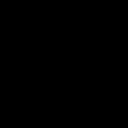
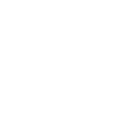
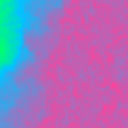
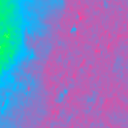
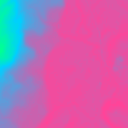
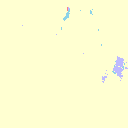

In [37]:
interactive_map = map(cube)

bounds = [[float(cube.lat[-1].values), float(cube.lon[0].values)], [float(cube.lat[0].values), float(cube.lon[-1].values)]]

# Add RGB layer
folium.raster_layers.ImageOverlay(
    image=rgb,
    bounds=bounds,
    mercator_project=True,
    name="Sentinel 2 RGB",
    opacity=0.95,
).add_to(interactive_map)

# Add cloud layer
folium.raster_layers.ImageOverlay(
    image=mask,
    bounds=bounds,
    mercator_project=True,
    name="S2 Mask",
    colormap = lambda x: (1, x/10, -x/2, x),
).add_to(interactive_map)


# Add NASADEM
folium.raster_layers.ImageOverlay(
    image=nasadem,
    bounds=bounds,
    mercator_project=True,
    name="NASADEM",
    opacity=0.75,
    show=False,
    colormap = plt.get_cmap("terrain"),
).add_to(interactive_map)

# Add ALOS
folium.raster_layers.ImageOverlay(
    image=alos,
    bounds=bounds,
    mercator_project=True,
    name="ALOS",
    opacity=0.75,
    show=False,
    colormap = plt.get_cmap("terrain"),
).add_to(interactive_map)


# Add COP
folium.raster_layers.ImageOverlay(
    image=cop,
    bounds=bounds,
    mercator_project=True,
    name="COP",
    opacity=0.75,
    show=False,
    colormap = plt.get_cmap("terrain"),
).add_to(interactive_map)

# Add ESA-WC
folium.raster_layers.ImageOverlay(
    image=lc/255,
    bounds=bounds,
    mercator_project=True,
    name="ESA WorldCover",
    opacity=0.8,
    show=False,
    colormap = plt.get_cmap("Set3"),
).add_to(interactive_map)

# # Add NDVI Climatology
# for clim in ndvi_clims:
#     folium.raster_layers.ImageOverlay(
#         image=clim['ndvi_mean'],
#         bounds=bounds,
#         mercator_project=True,
#         name=f"NDVI {clim['month']}",
#         opacity=0.9,
#         show=False,
#         colormap = cmap_veg,
#     ).add_to(interactive_map)
    
folium.map.LayerControl(position='topright', collapsed=False, autoZIndex=True).add_to(interactive_map)

interactive_map

# Other Plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07337819654909761..1.188879171500157].


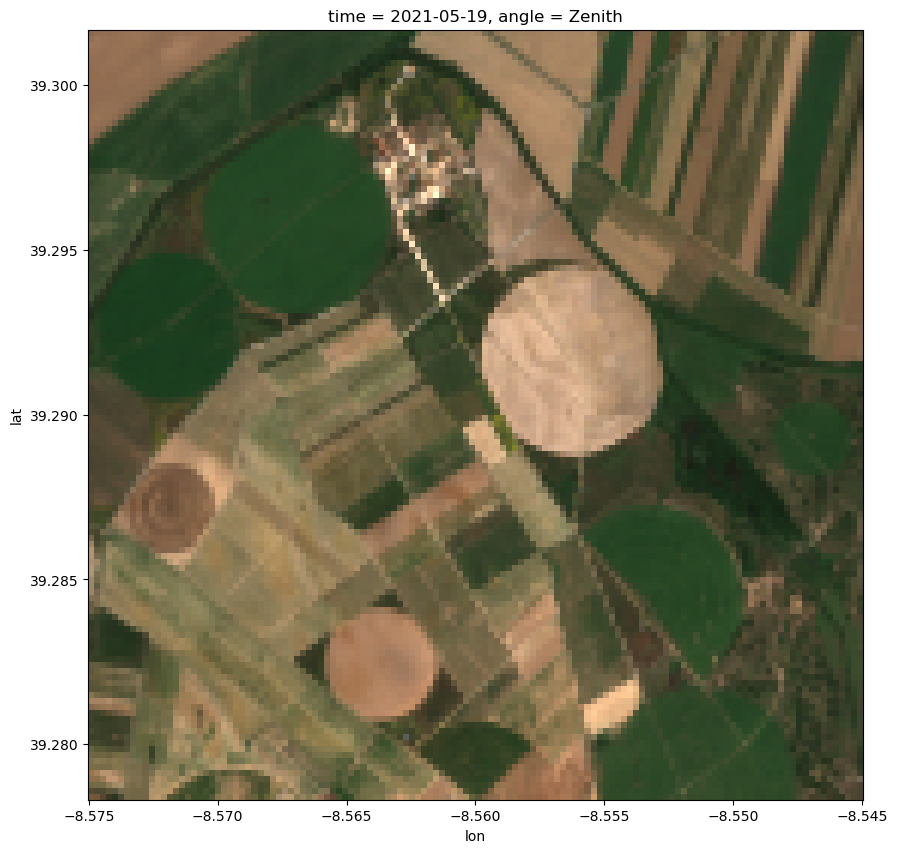

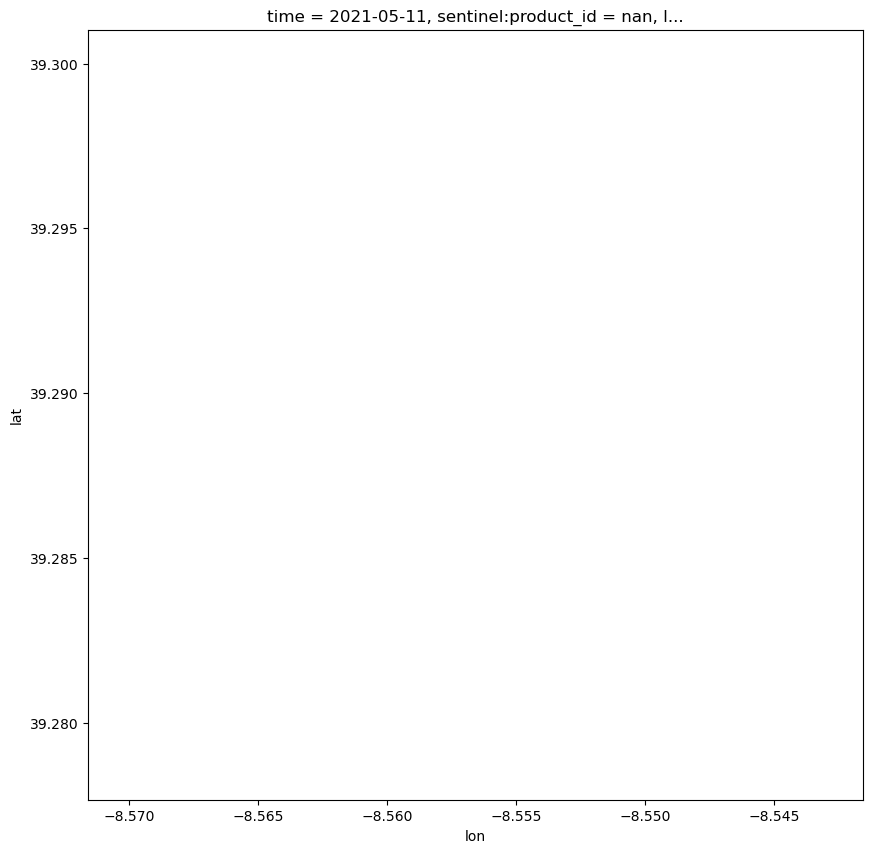

In [19]:
rgb_brightness_scaling=3

(cube[["s2_B04", "s2_B03", "s2_B02"]].to_array("band").isel(time = S2_t) * rgb_brightness_scaling).plot.imshow(rgb="band", figsize = (10, 10))
(input[["s2_B04", "s2_B03", "s2_B02"]].to_array("band").isel(time = S2_t) * rgb_brightness_scaling).plot.imshow(rgb="band", figsize = (10, 10))

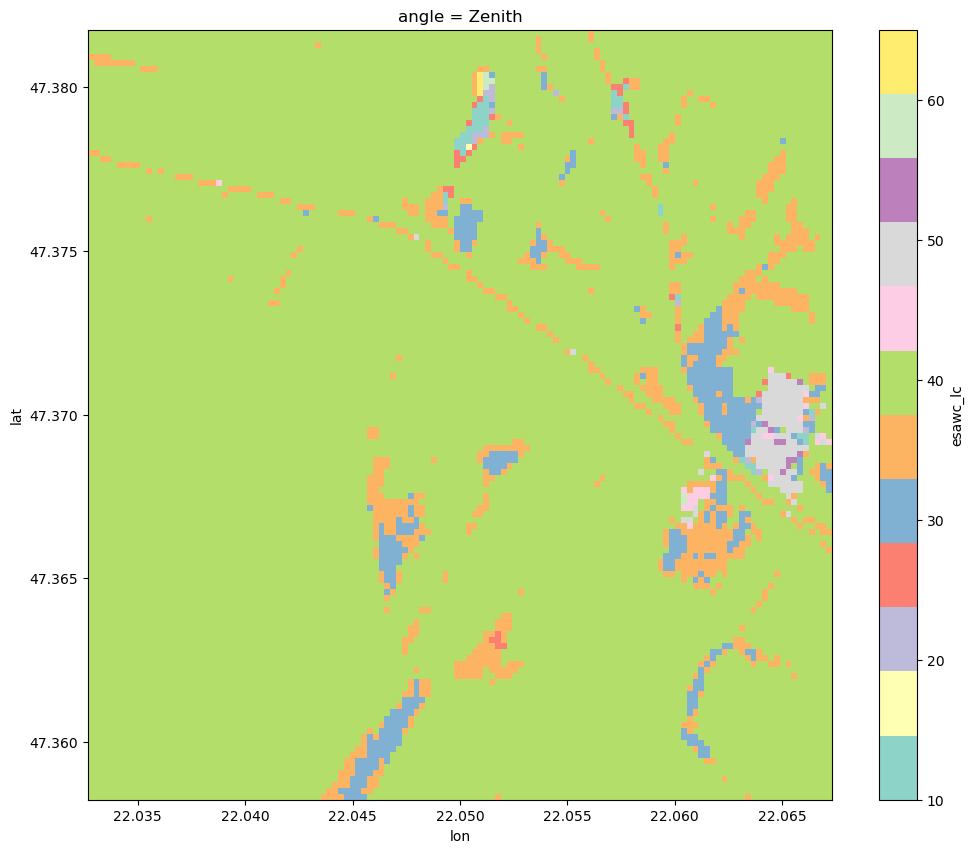

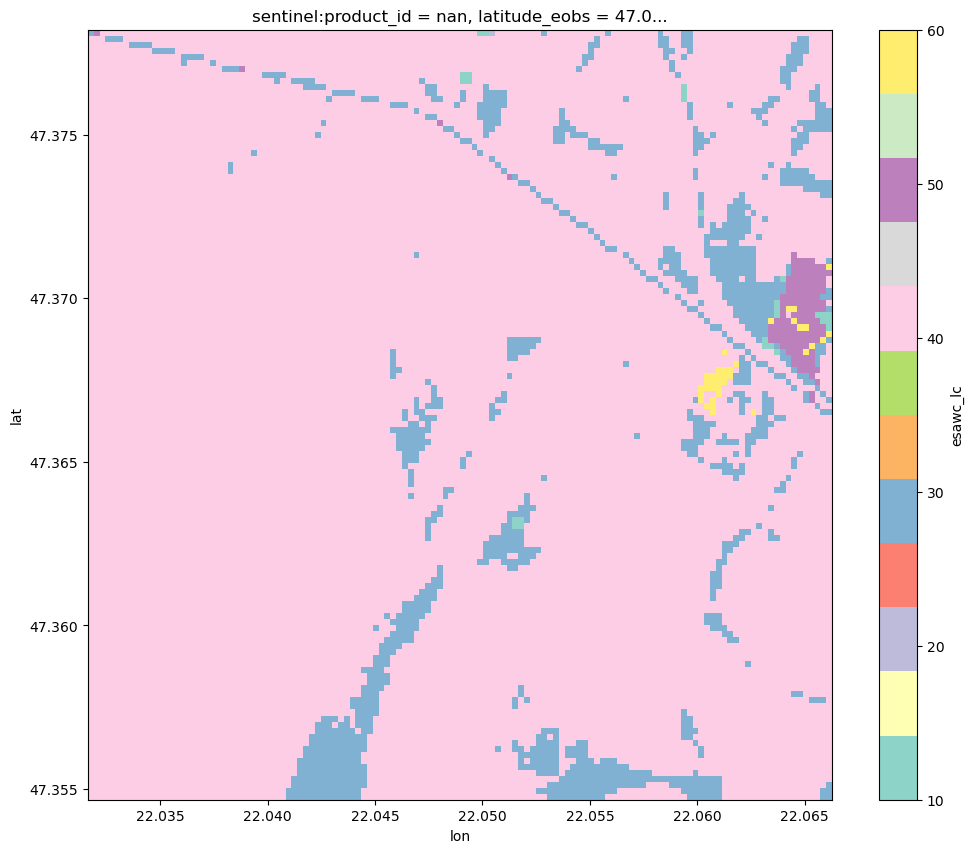

In [38]:
cube.esawc_lc.plot(cmap="Set3", figsize = (12, 10))
input.esawc_lc.plot(cmap="Set3", figsize = (12, 10))

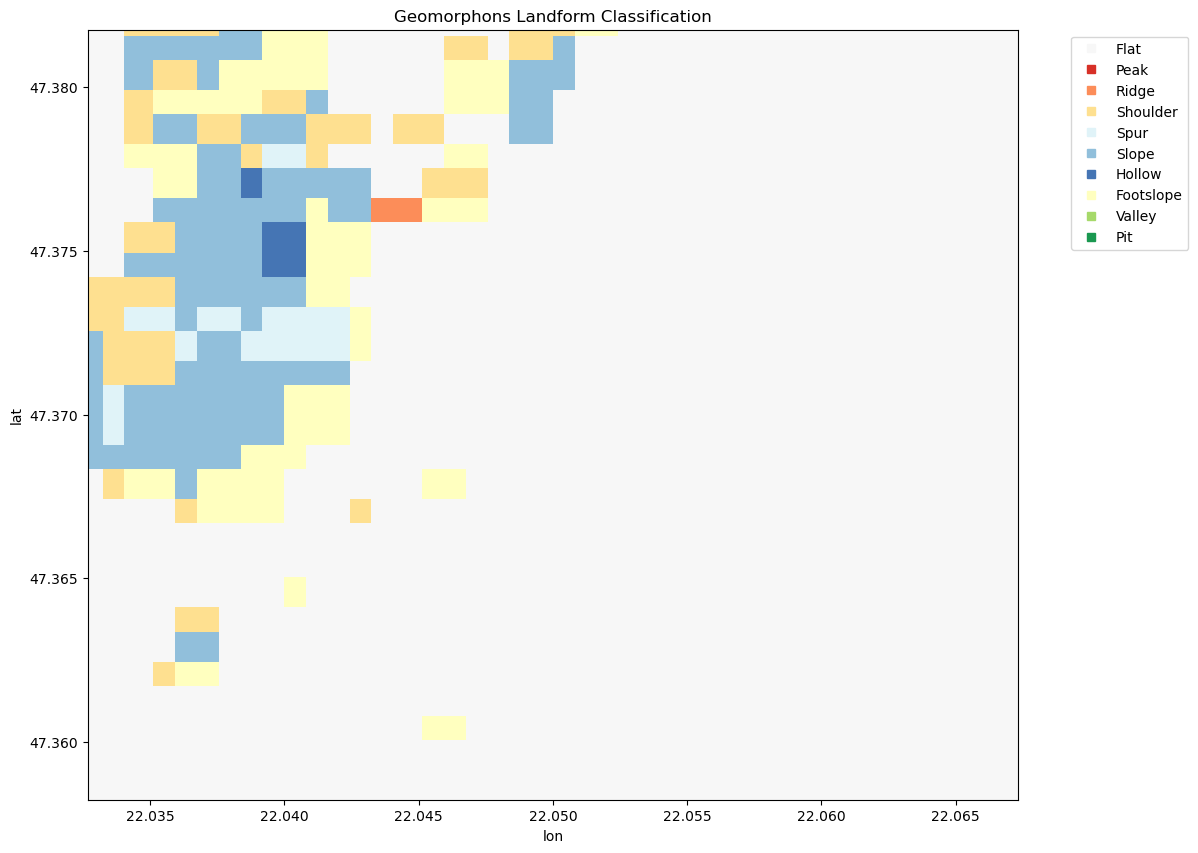

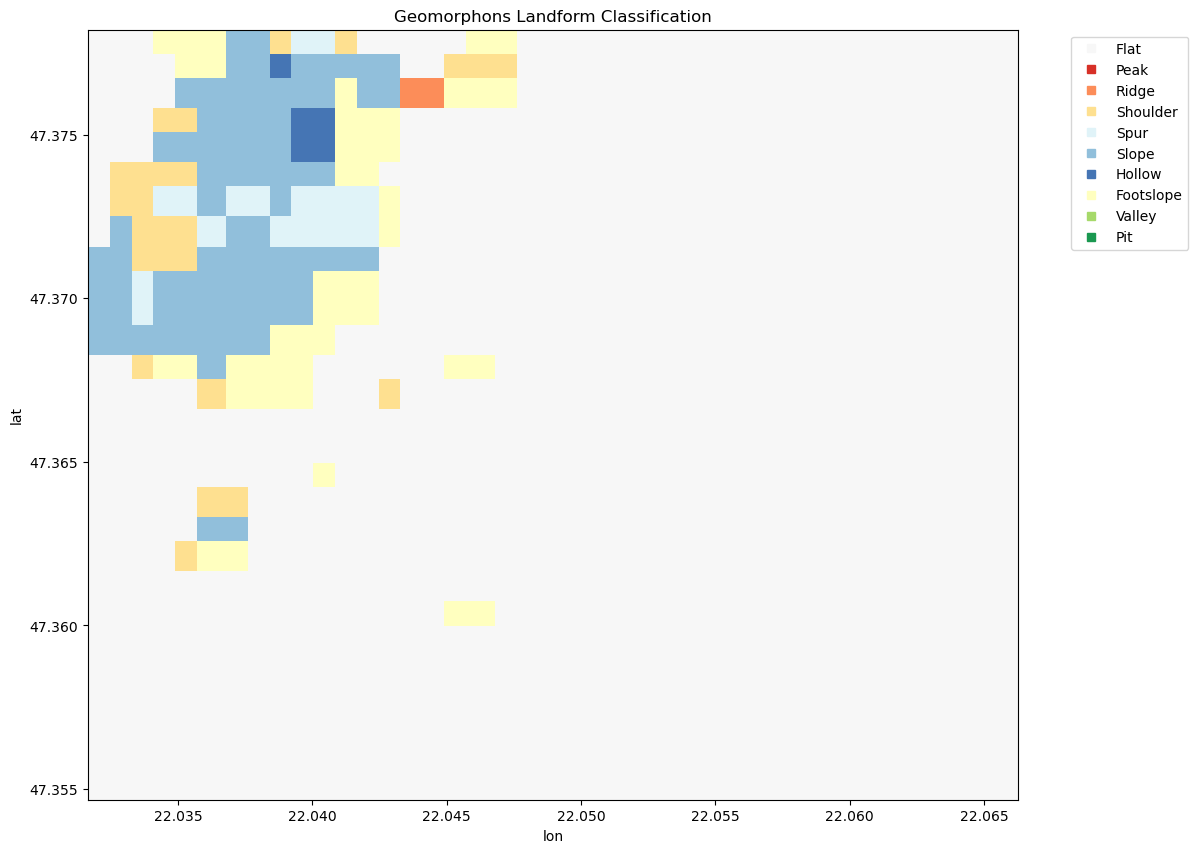

In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Geomorphon landform classes (1–10/11 depending on dataset)
classes = {
    1: "Flat",
    2: "Peak",
    3: "Ridge",
    4: "Shoulder",
    5: "Spur",
    6: "Slope",
    7: "Hollow",
    8: "Footslope",
    9: "Valley",
    10: "Pit",
}

# Assign a color to each class
colors = [
    "#f7f7f7",  # Flat
    "#d73027",  # Peak
    "#fc8d59",  # Ridge
    "#fee090",  # Shoulder
    "#e0f3f8",  # Spur
    "#91bfdb",  # Slope
    "#4575b4",  # Hollow
    "#ffffbf",  # Footslope
    "#a6d96a",  # Valley
    "#1a9850",  # Pit
]

# Discrete colormap
cmap = mcolors.ListedColormap(colors)
bounds = list(classes.keys())
norm = mcolors.BoundaryNorm(bounds + [bounds[-1] + 1], cmap.N)

# Plot
plt.figure(figsize=(12, 10))
im = cube.geom_cls.plot.imshow(cmap=cmap, norm=norm, add_colorbar=False)

# Custom legend
patches = [plt.plot([], [], marker="s", ls="", color=colors[i-1],
                    label=classes[i])[0] for i in classes]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Geomorphons Landform Classification")
plt.show()

# Plot
plt.figure(figsize=(12, 10))
im = input.geom_cls.plot.imshow(cmap=cmap, norm=norm, add_colorbar=False)

# Custom legend
patches = [plt.plot([], [], marker="s", ls="", color=colors[i-1],
                    label=classes[i])[0] for i in classes]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Geomorphons Landform Classification")
plt.show()



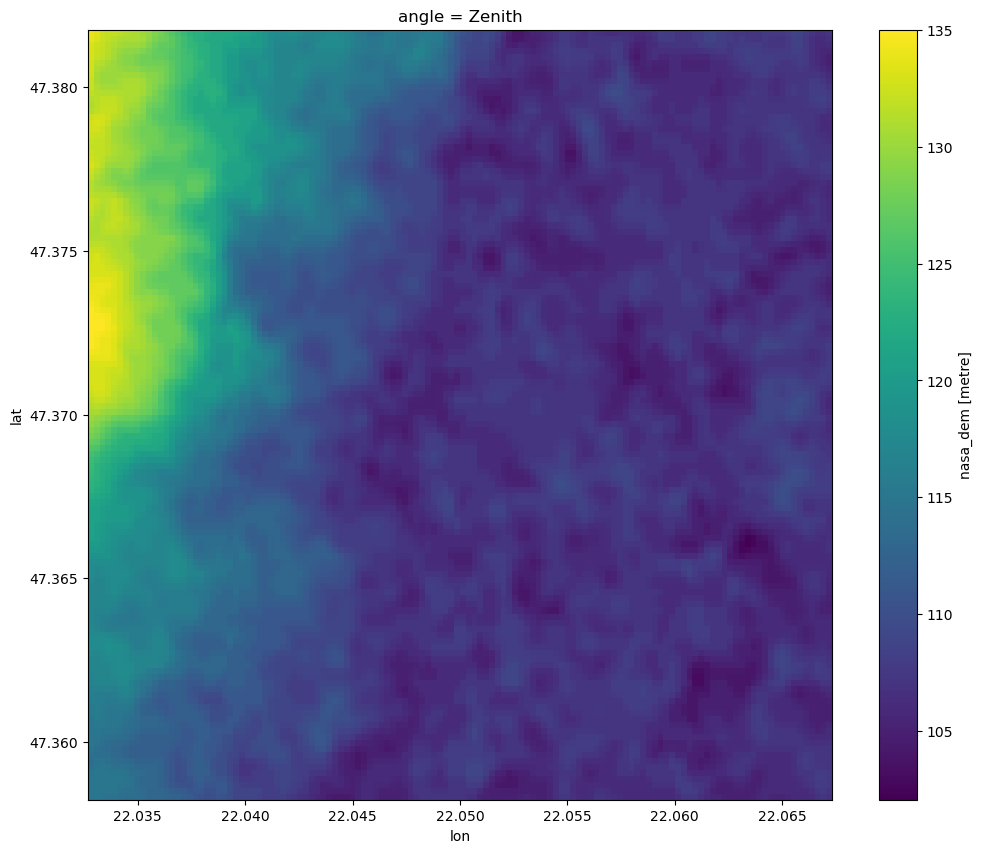

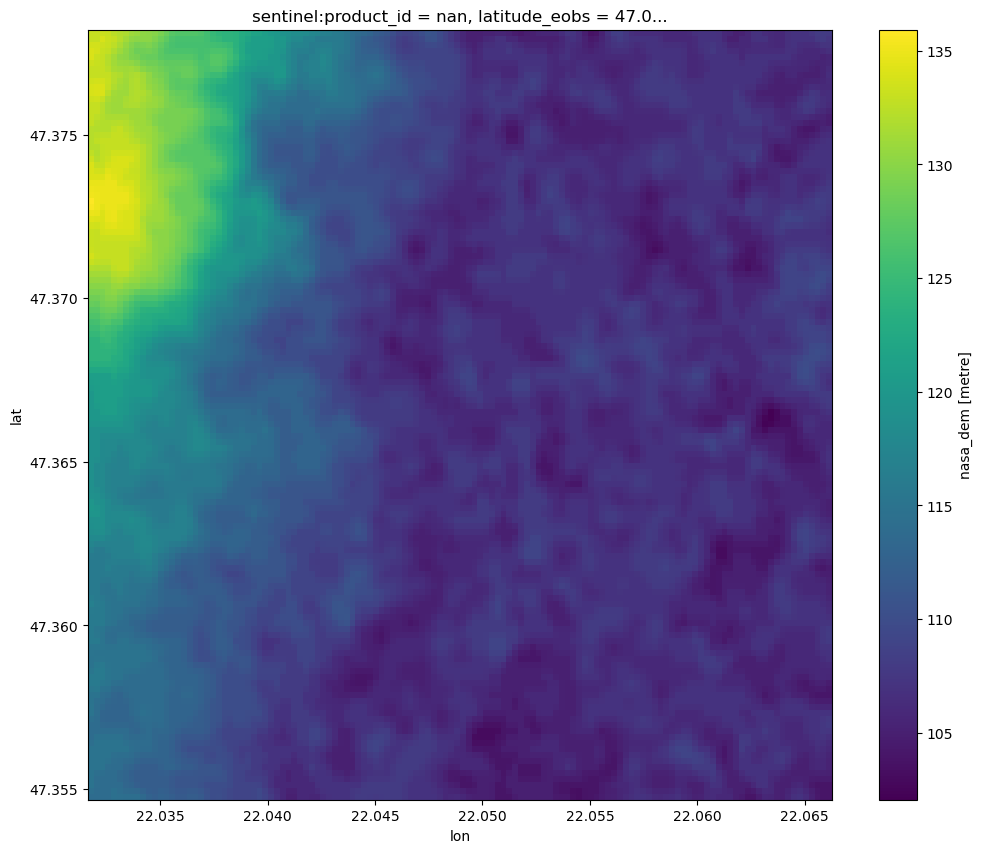

In [40]:
cube.nasa_dem.plot.imshow(figsize = (12, 10))
input.nasa_dem.plot.imshow(figsize = (12, 10))

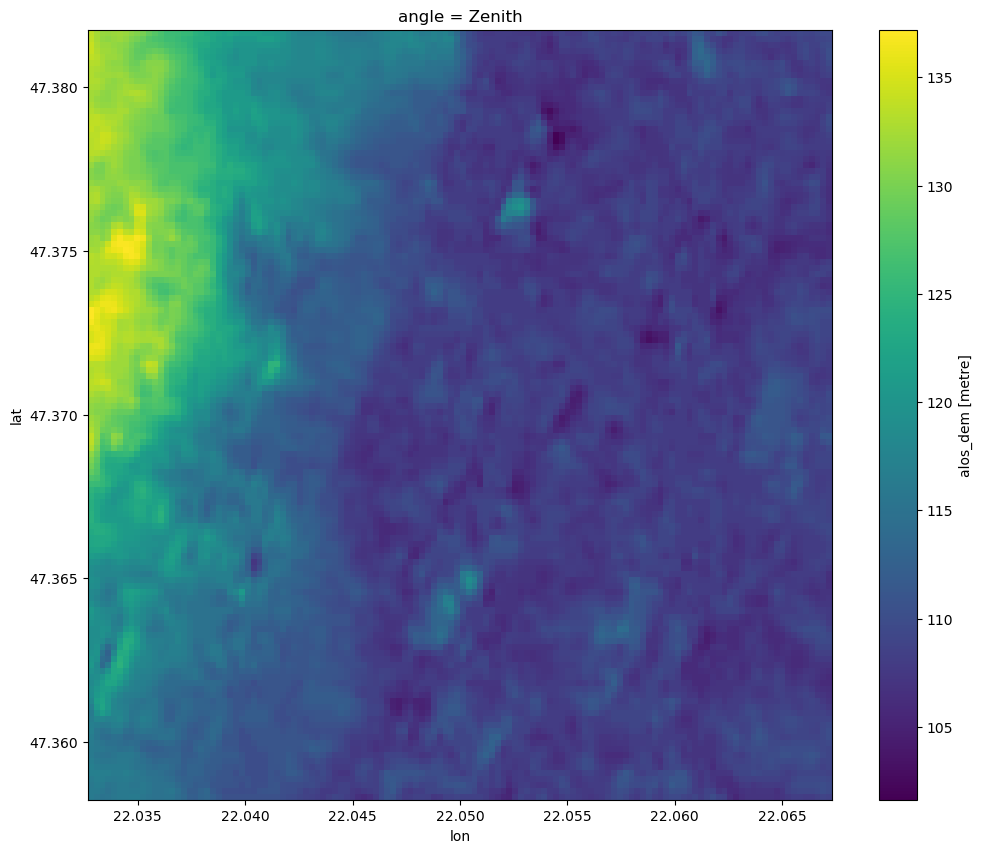

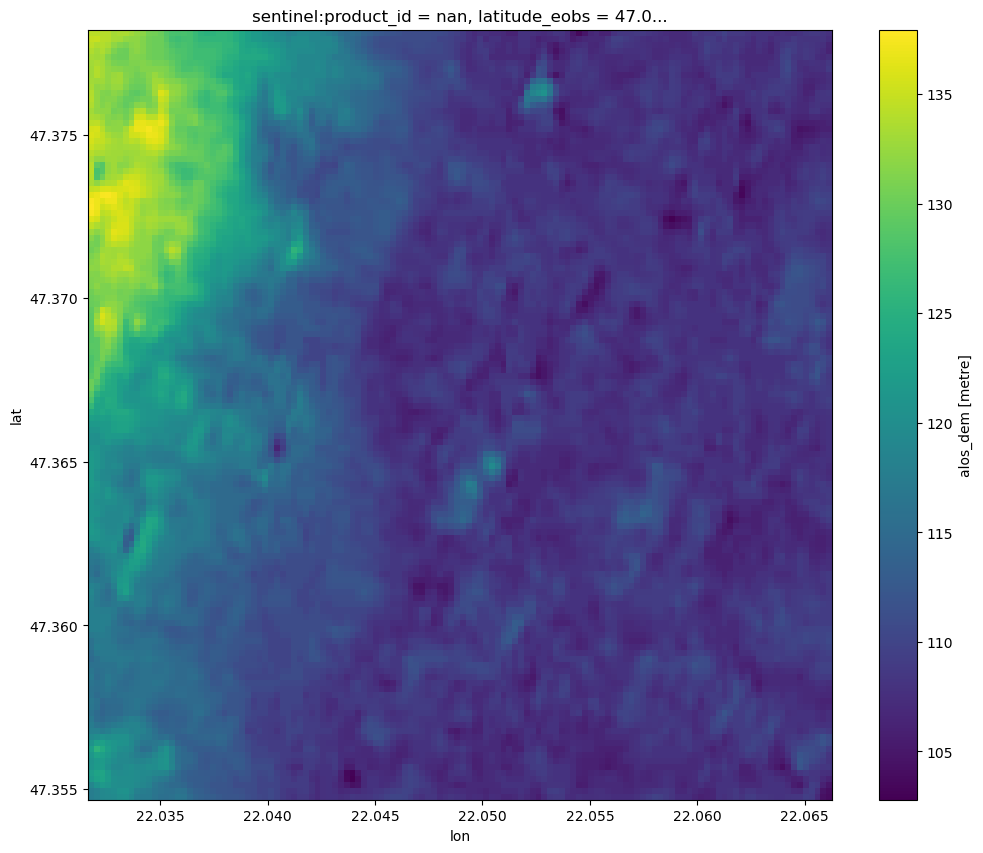

In [41]:
cube.alos_dem.plot.imshow(figsize = (12, 10))
input.alos_dem.plot.imshow(figsize = (12, 10))

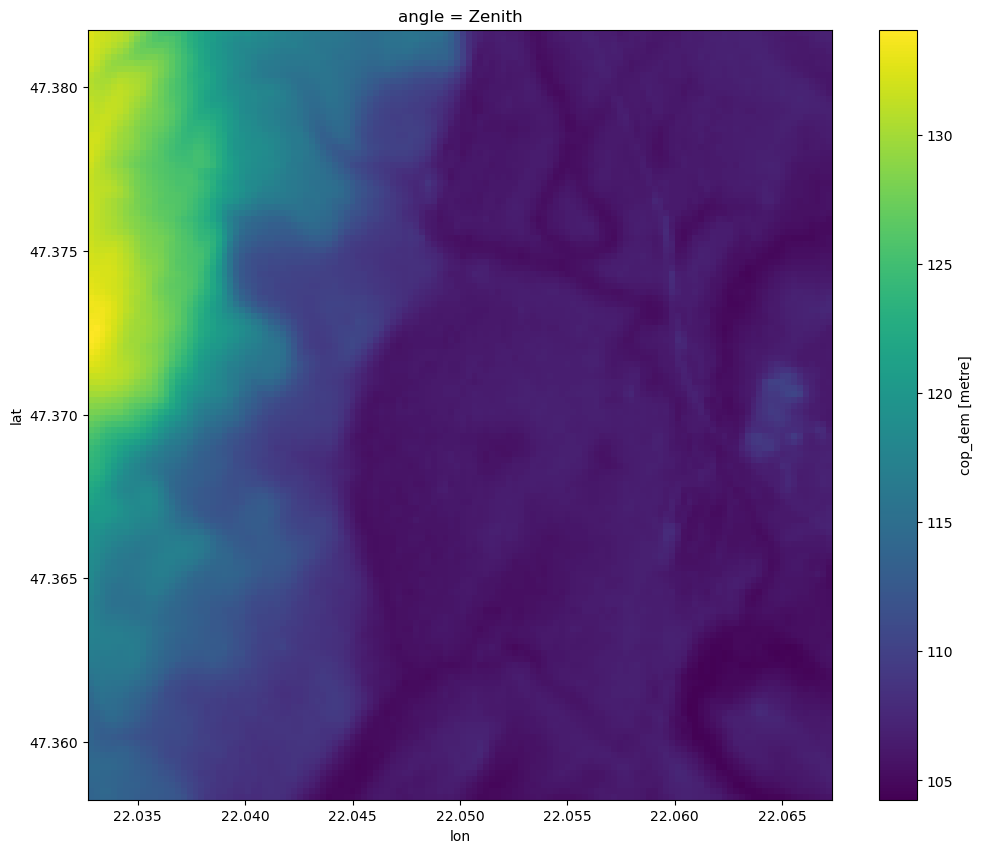

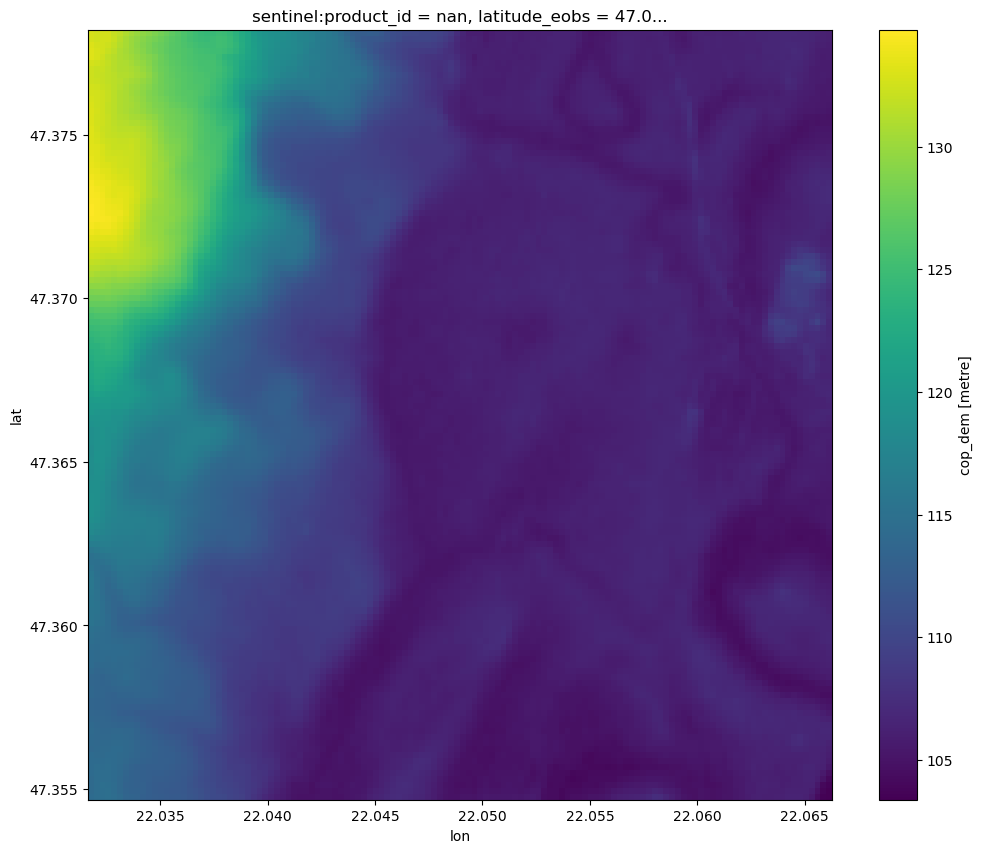

In [42]:
cube.cop_dem.plot.imshow(figsize = (12, 10))
input.cop_dem.plot.imshow(figsize = (12, 10))

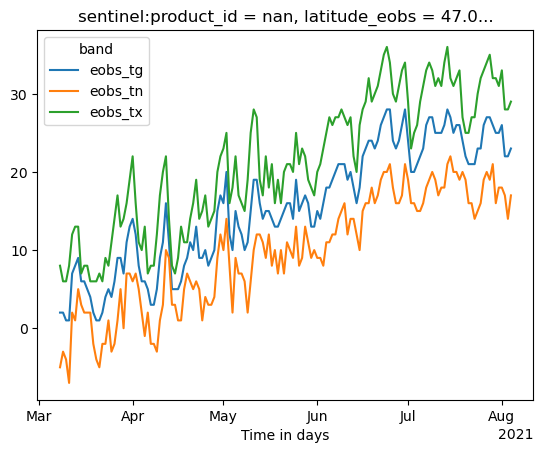

In [43]:
input[["eobs_tg","eobs_tn","eobs_tx"]].to_array("band").plot(hue = "band")

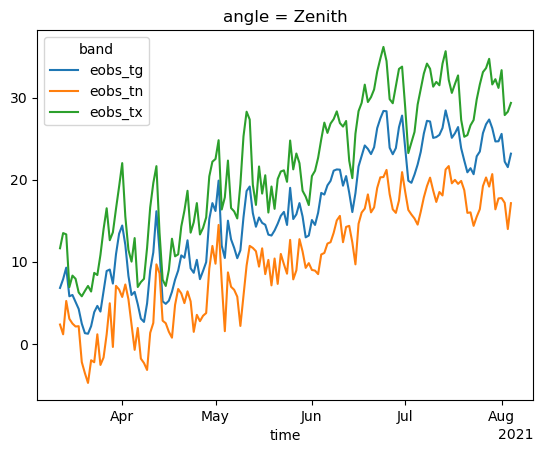

In [44]:
cube[["eobs_tg","eobs_tn","eobs_tx"]].to_array("band").plot(hue = "band")

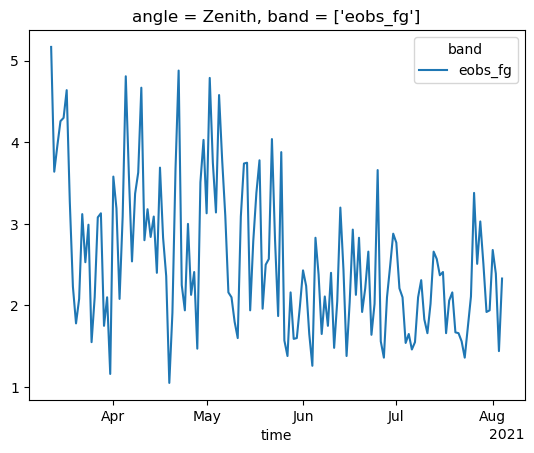

In [54]:
cube[[ "eobs_fg"]].to_array("band").plot(hue = "band")

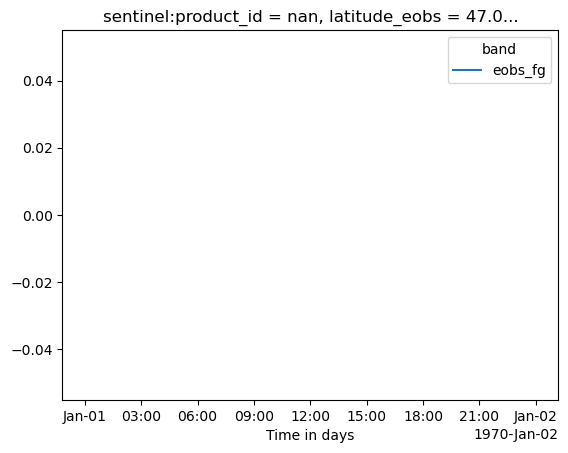

In [55]:
input[["eobs_fg"]].to_array("band").plot(hue = "band")